In [25]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import scale

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

from xgboost.sklearn import XGBRegressor
import xgboost as xgb

import math

# Regression for residential sector

In [26]:
residential_merged_dataset = pd.read_csv("Residential_regression_Merged-Dataset.csv")

In [27]:
residential_merged_dataset

,Year,Month,Cents/kWh,Year_Month,CLDD,TAVG,AWND,HTDD,area,AK,...,Solar Thermal and Photovoltaic,Total,Wind,Wood and Wood Derived Fuels,Population,solar-generation,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,2014,1,17.49,2014.10,0.000000,21.879612,8.695349,1305.918033,664988,1,...,0.00,589929.95,16419.25,0.00,736283,0.0,0,0,0,1
1,2014,1,10.69,2014.10,0.000000,36.799074,6.456250,862.879630,52420,0,...,0.00,14290946.25,0.00,289349.53,4841799,0.0,0,0,0,1
2,2014,1,8.27,2014.10,0.000000,34.824272,7.872222,925.617647,53178,0,...,0.00,5638766.82,0.00,118451.33,2967392,0.0,0,0,0,1
3,2014,1,10.83,2014.10,0.324561,45.371930,4.735294,601.394737,113990,0,...,185578.77,9046791.30,29081.61,14920.86,6730413,34.0,0,0,0,1
4,2014,1,16.57,2014.10,5.453177,51.164214,4.103704,431.618729,163694,0,...,388107.97,15662855.12,606522.67,348637.91,38596972,126.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,2019,12,19.17,2019.12,0.000000,23.542857,5.340000,1272.742857,9616,0,...,9607.00,203264.00,34590.00,40761.00,623651,4.0,0,0,0,1
3596,2019,12,9.47,2019.12,0.000000,34.460550,4.565517,939.321101,71298,0,...,1839.00,9257050.00,640575.00,126150.00,7698332,6.0,0,0,0,1
3597,2019,12,14.19,2019.12,0.000000,25.253801,7.783333,1220.421053,65496,0,...,3484.00,5312421.00,142151.00,81503.00,5836210,3.0,0,0,0,1
3598,2019,12,10.54,2019.12,0.000000,38.174242,6.009091,811.969231,24230,0,...,0.00,4734903.00,166097.00,0.00,1781015,1.0,0,0,0,1


In [28]:
nc_residential_data = residential_merged_dataset.loc[residential_merged_dataset['NC'] == 1]

In [29]:
nc_residential_data = nc_residential_data.drop(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL',
       'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV',
       'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA',
       'VT', 'WA', 'WI', 'WV', 'WY'], axis=1)
nc_residential_data

,Year,Month,Cents/kWh,Year_Month,CLDD,TAVG,AWND,HTDD,area,NC,...,Solar Thermal and Photovoltaic,Total,Wind,Wood and Wood Derived Fuels,Population,solar-generation,Season_Fall,Season_Spring,Season_Summer,Season_Winter
26,2014,1,10.26,2014.10,0.036842,34.824737,6.545833,923.084211,53819,1,...,38680.99,13238511.41,0.0,180199.82,9932887,1.0,0,0,0,1
76,2014,2,11.01,2014.20,0.282609,42.568108,6.730435,623.440217,53819,1,...,42805.28,10405166.73,0.0,173188.22,9941117,1.0,0,0,0,1
126,2014,3,10.92,2014.30,0.213542,45.542708,7.891304,597.515625,53819,1,...,68091.50,10744913.74,0.0,177262.63,9949347,1.0,0,1,0,0
176,2014,4,11.81,2014.40,26.452632,58.850000,7.800000,209.405263,53819,1,...,80696.91,8245466.38,0.0,189737.27,9957577,1.0,0,1,0,0
226,2014,5,11.36,2014.50,153.282486,68.235196,5.977273,55.604520,53819,1,...,90424.93,10559710.52,0.0,167091.73,9965807,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3376,2019,8,11.71,2019.80,357.320442,76.500000,5.713043,3.685083,53819,1,...,778407.00,13568356.00,23489.0,181173.00,10550191,14.0,0,0,1,0
3426,2019,9,11.80,2019.90,296.648352,74.737912,5.863636,5.615385,53819,1,...,671405.00,12139346.00,29392.0,151657.00,10559063,13.0,1,0,0,0
3476,2019,10,12.07,2019.10,91.925926,64.167895,6.526087,118.597884,53819,1,...,574726.00,9982424.00,42366.0,159951.00,10567936,12.0,1,0,0,0
3526,2019,11,11.57,2019.11,0.443243,47.063784,7.119048,533.767568,53819,1,...,452674.00,10506306.00,50620.0,171486.00,10576808,11.0,1,0,0,0


In [30]:
numeric_feature_name = ['Cents/kWh','CLDD', 'AWND', 'HTDD', 'TAVG', 'area',
                        'Population', 'solar-generation']

categorical_feature_name = ['Year', 'Month', 'Season_Spring', 'Season_Summer', 'Season_Fall', 'Season_Winter']

# fetch the respective numeric, categorical and output values
residential_numeric_features = pd.DataFrame(nc_residential_data[numeric_feature_name])
residential_categorical_features = pd.DataFrame(nc_residential_data[categorical_feature_name])
residential_y_val = pd.DataFrame(nc_residential_data['residential_usage'])

# reindex the unscaled dataframes to simplify the concatenation
residential_categorical_features = residential_categorical_features.reset_index(drop=True)
residential_y_val = residential_y_val.reset_index(drop=True)

In [31]:
# use min_max scaler to scale data
# max_abs_scaler = preprocessing.MaxAbsScaler()
max_abs_scaler = preprocessing.MaxAbsScaler()
residential_numeric_minmax = max_abs_scaler.fit_transform(residential_numeric_features)

In [32]:
df_residential_numeric = pd.DataFrame(residential_numeric_minmax, columns=numeric_feature_name)

In [33]:
df_residential_numeric

,Cents/kWh,CLDD,AWND,HTDD,TAVG,area,Population,solar-generation
0,0.831442,0.000081,0.761852,1.000000,0.436295,1.0,0.938332,0.071429
1,0.892220,0.000620,0.783337,0.675388,0.533306,1.0,0.939110,0.071429
2,0.884927,0.000468,0.918448,0.647303,0.570573,1.0,0.939887,0.071429
3,0.957050,0.058021,0.907821,0.226854,0.737291,1.0,0.940665,0.071429
4,0.920583,0.336211,0.695679,0.060238,0.854872,1.0,0.941442,0.071429
...,...,...,...,...,...,...,...,...
67,0.948947,0.783749,0.664926,0.003992,0.958416,1.0,0.996647,1.000000
68,0.956240,0.650670,0.682453,0.006083,0.936340,1.0,0.997485,0.928571
69,0.978120,0.201631,0.759554,0.128480,0.803915,1.0,0.998324,0.857143
70,0.937601,0.000972,0.828567,0.578244,0.589630,1.0,0.999162,0.785714


In [34]:
# concatenate the new numeric value and the categorical value
df_residential_train = pd.concat([residential_categorical_features, df_residential_numeric, residential_y_val], axis=1)



In [11]:
# the input into the regression function
regr_residential = df_residential_train.drop(['Year', 'Month', 'Season_Spring'],axis = 1)

In [12]:
#Train-Test Split
train, test = train_test_split(regr_residential, test_size=0.2)

X_train = train.drop(['residential_usage'],axis = 1)
y_train = train.residential_usage
X_test = test.drop(['residential_usage'],axis = 1)
y_test = test.residential_usage

In [ ]:
X_train

In [13]:
def evaluate_performances(y_test, y_pred):
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test, y_pred)))

In [14]:
#Visualize the output

def visualize_graph(df_pred):
    fig, axes = plt.subplots(3,1, figsize=(7,15))
    #Plot the result in box plot
    df_pred.plot(title="Actual vs. Predict result box plot",kind='box',ax=axes[0])
    #Plot the scatter plot 
    df_pred.plot.scatter(title="Actual vs. Predict result scatter plot",  x='Actual',y='Predicted', c='DarkBlue',ax=axes[1])
    #Plot the result in terms of kernel density estimation
    df_pred.plot(title="Actual vs. Predict result kernel density estimation", kind='density',ax=axes[2])

In [15]:
K = 5
model = XGBRegressor(objective ='reg:squarederror')
scores = cross_val_score(model, X_train, y_train, cv=K, scoring='neg_mean_squared_error', verbose=False)
avg_rmse = math.sqrt(abs(np.mean(scores)))

print('Average RMSE with {}-fold Cross Validation: {:.3f}'.format(K, avg_rmse))

Average RMSE with 5-fold Cross Validation: 586.460


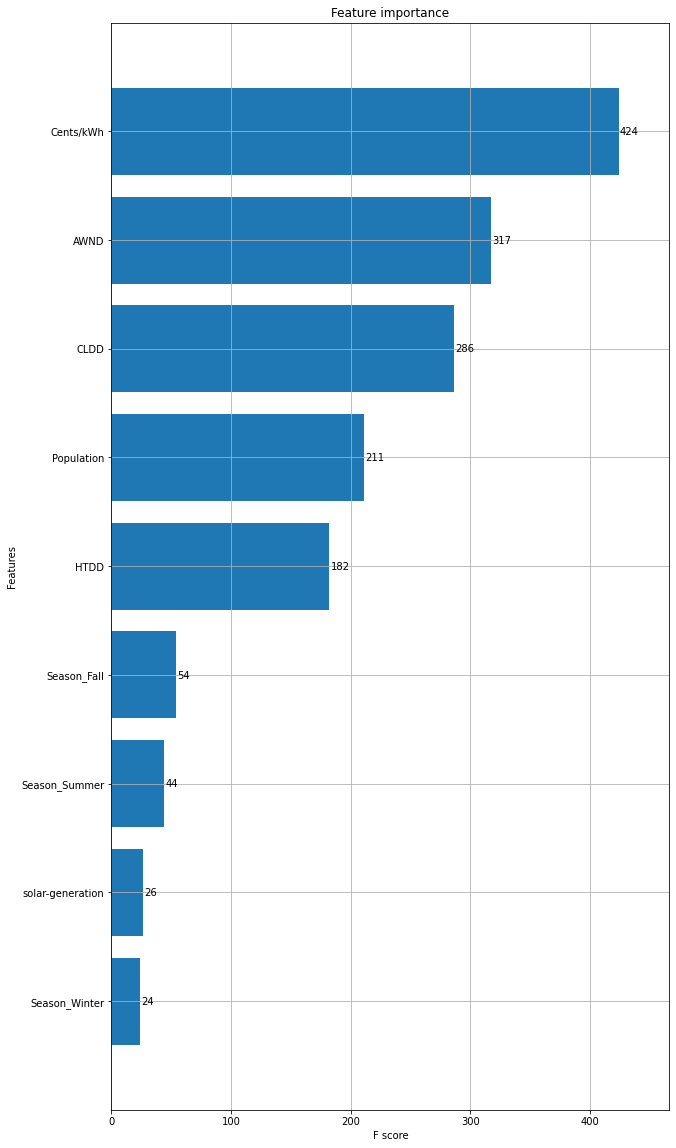

In [16]:
model = XGBRegressor(objective ='reg:squarederror')
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(10,20))
xgb.plot_importance(model, height=0.8, ax=ax)

In [17]:
def sm_regression(X_train,y_train,X_test,y_test):
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)

    model = sm.OLS(y_train,X_train)
    results = model.fit()
    results.params
    print(results.summary())
    predictions = results.predict(X_test)
    df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
    
    return df_pred

In [18]:
sm_regression(X_train, y_train, X_test, y_test)

                            OLS Regression Results                            
Dep. Variable:      residential_usage   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     60.19
Date:                Sun, 19 Jul 2020   Prob (F-statistic):           8.94e-23
Time:                        17:04:58   Log-Likelihood:                -399.96
No. Observations:                  57   AIC:                             819.9
Df Residuals:                      47   BIC:                             840.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              351.6744   9062.499  

,Actual,Predicted
50,4467.0,4862.875734
4,3839.0,4163.928593
44,4584.0,4227.854990
69,4223.0,3697.780922
10,3990.0,4658.045811
43,5774.0,5496.654431
61,4766.0,4854.806551
27,3265.0,3735.034674
49,4684.0,4562.186358
45,3947.0,3853.988621


Mean Absolute Error: 292.6548506506423
Mean Squared Error: 117185.508712844
Root Mean Squared Error: 342.32368996732316


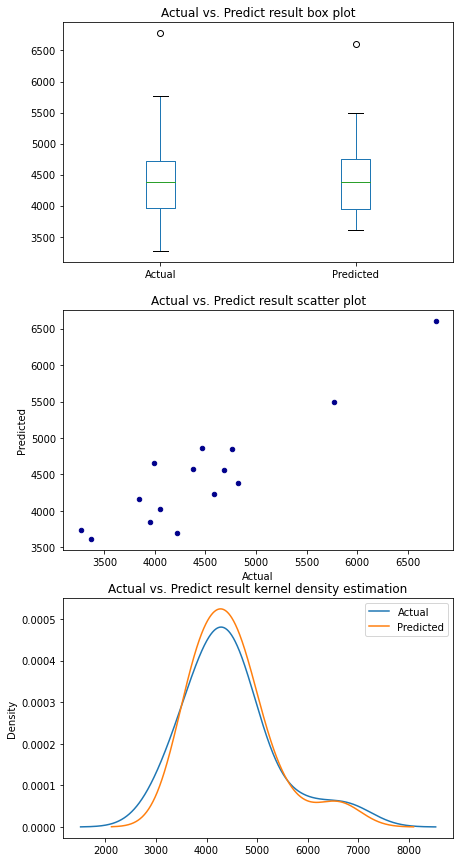

In [19]:
res_lr = LinearRegression()
res_lr.fit(X_train, y_train)
res_predictions = res_lr.predict(X_test)
evaluate_performances(y_test, res_predictions)
res_df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': res_predictions})
visualize_graph(res_df_pred)

In [36]:
def cal_vif(df):
    features= df[['Cents/kWh', 'CLDD', 'AWND', 'HTDD', 'Population', 'TAVG', 'area']]
    X = add_constant(features)
    vif=pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)
    
    return vif

In [37]:
cal_vif(df_residential_train)

Cents/kWh         3.050901
CLDD            102.068185
AWND              1.683081
HTDD            406.347948
Population        1.202919
TAVG            806.733599
area          22067.850300
dtype: float64

In [22]:
a  = res_lr.intercept_#截距
b = res_lr.coef_#回归系数
print("最佳拟合线:截距",a,",回归系数：",b)

最佳拟合线:截距 351.67444589911884 ,回归系数： [-161.92001801 -181.87318409  324.50466731 1284.44633625 4489.83100951
 -285.42618715 4000.96917698 1152.05440035  -94.52617627]


In [23]:
# Visualization
def visualization(y_pred):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,20))
    fig.suptitle('Predicted and Actual plot')
    ax1.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax1.legend(loc="upper right")
    ax2.plot(range(len(y_pred)),y_pred,'r',label="actual")
    ax2.legend(loc="upper right")
    ax3.plot(range(len(y_pred)),y_pred,'b',label="predict")
    ax3.plot(range(len(y_pred)),y_test,'r',label="test")
    ax3.legend(loc="upper right")
    plt.show()

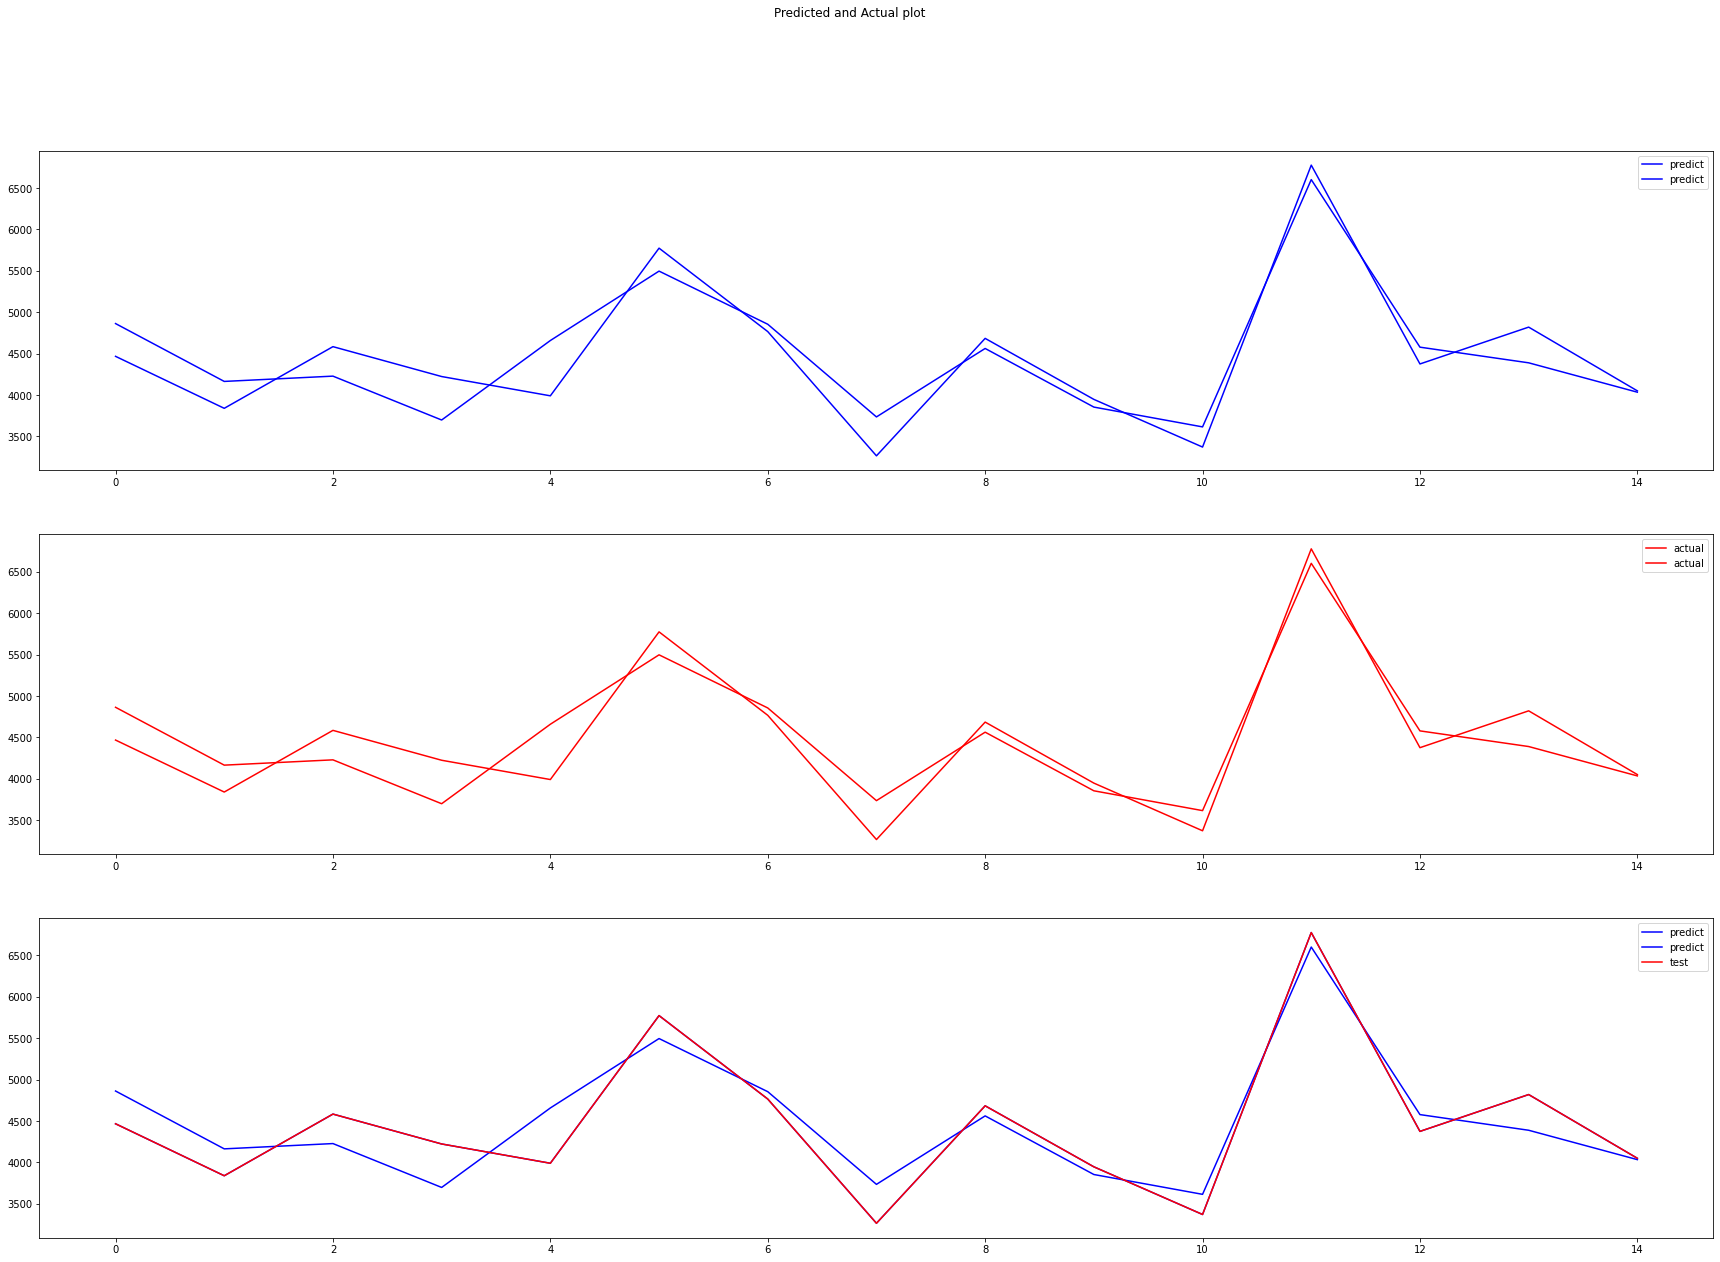

In [24]:
visualization(res_df_pred)